In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


from sklearn.ensemble import RandomForestRegressor


from sklearn.preprocessing import MinMaxScaler

%matplotlib inline


In [2]:
TRAIN_DATASET_PATH  = 'train.csv'

In [3]:
TEST_DATASET_PATH = 'test.csv'

**Описание датасета**

* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

In [4]:
df_train = pd.read_csv(TRAIN_DATASET_PATH)

In [5]:
df_train['test_data'] = 0

In [6]:
df_train.shape

(10000, 21)

In [7]:
df_test = pd.read_csv(TEST_DATASET_PATH)

In [8]:
df_test['Price']=0

In [9]:
df_test['test_data'] = 1

In [10]:
df_test.shape

(5000, 21)

In [11]:
df = pd.concat([df_train, df_test], axis = 0)

In [12]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,test_data
count,15000.000000,15000.000000,15000.000000,15000.000000,11846.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,7825.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,8393.136933,50.693600,1.897000,56.360350,36.851792,6.174467,8.561800,12.606600,3.321575e+03,0.119196,24.769267,5370.404933,8.113667,1144.162428,1.319467,4.235133,142759.238266,0.333333
std,4850.111673,43.786257,0.839229,20.423913,71.120183,24.016979,5.323113,6.780165,1.637078e+05,0.119371,17.532278,4013.364403,23.841946,1029.296278,1.489012,4.796545,126256.734739,0.471420
min,0.000000,0.000000,0.000000,1.136859,0.333490,0.000000,1.000000,0.000000,1.908000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4188.750000,20.000000,1.000000,41.814371,22.896130,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,0.000000,0.000000
50%,8378.500000,37.000000,2.000000,52.645757,32.822810,6.000000,7.000000,12.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,153860.591184,0.000000
75%,12594.250000,75.000000,2.000000,66.036608,45.144624,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.000000,6.000000,215564.596644,1.000000
max,16798.000000,212.000000,19.000000,641.065193,7480.592129,2014.000000,78.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 4999
Data columns (total 21 columns):
Id               15000 non-null int64
DistrictId       15000 non-null int64
Rooms            15000 non-null float64
Square           15000 non-null float64
LifeSquare       11846 non-null float64
KitchenSquare    15000 non-null float64
Floor            15000 non-null int64
HouseFloor       15000 non-null float64
HouseYear        15000 non-null int64
Ecology_1        15000 non-null float64
Ecology_2        15000 non-null object
Ecology_3        15000 non-null object
Social_1         15000 non-null int64
Social_2         15000 non-null int64
Social_3         15000 non-null int64
Healthcare_1     7825 non-null float64
Helthcare_2      15000 non-null int64
Shops_1          15000 non-null int64
Shops_2          15000 non-null object
Price            15000 non-null float64
test_data        15000 non-null int64
dtypes: float64(8), int64(10), object(3)
memory usage: 2.5+ MB


## Исследование данных

### Поиск явных ошибок в данных

In [14]:
df.loc[(df['Rooms']==0), ['Rooms','Square', 'LifeSquare', 'KitchenSquare','Price', 'DistrictId', 'HouseYear']].head()

,Rooms,Square,LifeSquare,KitchenSquare,Price,DistrictId,HouseYear
1397,0.0,138.427694,136.215499,0.0,268394.744389,27,2016
1981,0.0,212.932361,211.231125,0.0,302211.260887,27,2008
2269,0.0,41.790881,NaN,0.0,98129.976788,27,1977
3911,0.0,49.483501,NaN,0.0,217009.338463,28,2015
4366,0.0,81.491446,NaN,0.0,212864.799112,6,1977


In [15]:
df.loc[(df['Rooms']==0)].shape

(10, 21)

##### Ошибки в признаке KitchenSquare

In [16]:
df.loc[df['KitchenSquare']==0, ['Rooms','Square', 'LifeSquare', 'KitchenSquare','Price', 'DistrictId', 'HouseYear']].head()

,Rooms,Square,LifeSquare,KitchenSquare,Price,DistrictId,HouseYear
2,2.0,44.947953,29.197612,0.0,220925.908524,53,1968
7,2.0,80.312926,NaN,0.0,221244.156664,74,1977
23,3.0,118.907612,NaN,0.0,571069.052600,54,1977
26,3.0,106.958871,0.641822,0.0,337299.867936,27,2018
39,2.0,60.503248,NaN,0.0,229778.057902,23,1977


In [17]:
df.loc[df['KitchenSquare']==0].shape

(1032, 21)

In [18]:
df.loc[df['KitchenSquare']>df['LifeSquare'],['Rooms','Square', 'LifeSquare', 'KitchenSquare','Price', 'DistrictId', 'HouseYear']].head()

,Rooms,Square,LifeSquare,KitchenSquare,Price,DistrictId,HouseYear
227,3.0,79.722243,44.731219,72.0,370148.625285,2,1987
551,1.0,48.128114,45.023531,48.0,146950.912410,6,2013
1064,1.0,47.100719,46.447960,2014.0,108337.484207,62,2014
1369,2.0,68.841073,64.234956,66.0,189244.249909,27,2014
1800,1.0,37.805231,2.228592,11.0,137402.092529,27,2015


In [19]:
df.loc[df['KitchenSquare']>df['LifeSquare']].shape

(31, 21)

##### Ошибки в признаке LifeSquare

In [20]:
df.loc[df['LifeSquare']==0].shape

(0, 21)

In [21]:
df.loc[df['LifeSquare']>df['Square'], ['Rooms','Square', 'LifeSquare', 'KitchenSquare','Price', 'DistrictId', 'HouseYear']].head()

,Rooms,Square,LifeSquare,KitchenSquare,Price,DistrictId,HouseYear
28,1.0,42.530043,43.967759,1.0,95338.198549,23,2014
44,3.0,104.211396,106.340403,0.0,435462.048070,38,2017
52,2.0,61.400054,65.224603,0.0,199215.452229,1,2016
123,3.0,85.952306,89.803753,1.0,309688.592681,25,2017
153,1.0,51.831473,53.491301,1.0,131797.472284,62,2015


In [22]:
df.loc[df['LifeSquare']>df['Square']].shape

(723, 21)

##### Ошибки в признаке Square

In [23]:
df.loc[df['Square']<10, ['Rooms','Square', 'LifeSquare', 'KitchenSquare','Price', 'DistrictId', 'HouseYear']].head()

,Rooms,Square,LifeSquare,KitchenSquare,Price,DistrictId,HouseYear
212,2.0,5.497061,67.628717,1.0,412511.088764,88,1977
1316,1.0,4.633498,1.969969,1.0,107604.269441,27,1977
1608,1.0,2.596351,4.604943,1.0,137597.601458,6,2014
3280,1.0,4.380726,40.805837,1.0,97560.720383,27,2013
3413,1.0,5.129222,5.549458,1.0,369472.403061,5,1977


In [24]:
df.loc[df['Square']<10].shape

(20, 21)

##### Ошибки в признаке Floor

In [25]:
df.loc[df['Floor'] > df['HouseFloor'],['Rooms','Square', 'LifeSquare', 'KitchenSquare','Price', 'DistrictId', 'HouseYear'] ].head()

,Rooms,Square,LifeSquare,KitchenSquare,Price,DistrictId,HouseYear
7,2.0,80.312926,NaN,0.0,221244.156664,74,1977
14,1.0,53.769097,52.408027,1.0,140647.565937,27,1977
16,2.0,49.360648,31.993964,5.0,117000.381287,27,1983
21,2.0,64.711835,NaN,1.0,127200.026511,27,1977
23,3.0,118.907612,NaN,0.0,571069.052600,54,1977


In [26]:
df.loc[df['Floor'] > df['HouseFloor']].shape

(2709, 21)

### Поиск зависимостей

##### Площадь и жилая площадь от количества  комнат

###### Зависимость жилой площади от числа комнат

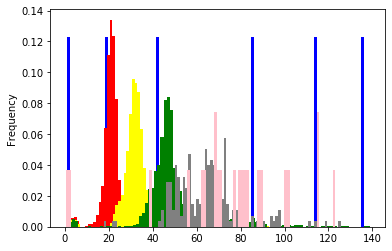

In [27]:
df.loc[(df['LifeSquare']<150)&(df['Rooms']==0), 'LifeSquare'].plot.hist(bins = 100, color = 'blue', density = True)
df.loc[(df['LifeSquare']<150)&(df['Rooms']==1), 'LifeSquare'].plot.hist(bins = 100, color = 'red', density = True)
df.loc[(df['LifeSquare']<150)&(df['Rooms']==2), 'LifeSquare'].plot.hist(bins = 100, color = 'yellow', density = True)
df.loc[(df['LifeSquare']<150)&(df['Rooms']==3), 'LifeSquare'].plot.hist(bins = 100, color = 'green', density = True)
df.loc[(df['LifeSquare']<150)&(df['Rooms']==4), 'LifeSquare'].plot.hist(bins = 100, color = 'grey', density = True)
df.loc[(df['LifeSquare']<150)&(df['Rooms']==5), 'LifeSquare'].plot.hist(bins = 100, color = 'pink', density = True)

###### Зависимость жилой площади от числа комнат

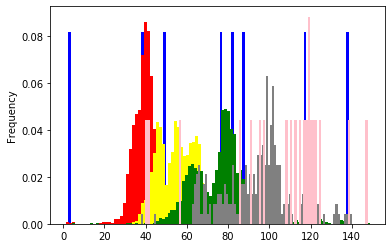

In [28]:
df.loc[(df['Square']<150)&(df['Rooms']==0), 'Square'].plot.hist(bins = 100, color = 'blue', density = True)
df.loc[(df['Square']<150)&(df['Rooms']==1), 'Square'].plot.hist(bins = 100, color = 'red', density = True)
df.loc[(df['Square']<150)&(df['Rooms']==2), 'Square'].plot.hist(bins = 100, color = 'yellow', density = True)
df.loc[(df['Square']<150)&(df['Rooms']==3), 'Square'].plot.hist(bins = 100, color = 'green', density = True)
df.loc[(df['Square']<150)&(df['Rooms']==4), 'Square'].plot.hist(bins = 100, color = 'grey', density = True)
df.loc[(df['Square']<150)&(df['Rooms']==5), 'Square'].plot.hist(bins = 100, color = 'pink', density = True)

### Функции корректировки данных

#### Функции корректировки ошибочных наблюдений

In [29]:
#Корректировка количества комнат
def rooms_correction(df):
    df.loc[df['Rooms'] == 0, 'Rooms'] = 1
    return(df)

##### Функции корректировки нулевых площадей

In [30]:
#Замена KitchenSquare = 0 на медианы по комнатам
def Kitchen_Median(df):
    for i in df['Rooms'].unique():
        df.loc[(df['KitchenSquare']==0)&(df['Rooms']==i) , 'KitchenSquare'] = df.loc[(df['Rooms']==i) , 'KitchenSquare'].median()
    return(df)

In [31]:
#Замена LifeSquare < 7 
#Замена: lifeSquare = (Square - Kitchen) * медиана соотношения (Square/LifeSquare)
def LifeSquare_diff(df):
    df['tmp'] = df['LifeSquare'] / (df['Square'] - df['KitchenSquare'])
    for i in df['Rooms'].unique():
        df.loc[(df['Rooms']==i)&(df['LifeSquare'] <= 7), 'LifeSquare'] = df.loc[df['Rooms']==i, 'tmp'].median() * (df.loc[(df['Rooms']==i)&(df['LifeSquare']<=7), 'Square'] - df.loc[(df['Rooms']==i)&(df['LifeSquare']<=7), 'KitchenSquare'])
    df.drop(columns = ['tmp'], inplace = True)    
    return(df)

In [32]:
#Замена Square < 10 на медианнные значения по количеству комнат
def Square_Median(df):
    for i in df['Rooms'].unique():
        df.loc[(df['Square']<=10)&(df['Rooms']==i), 'Square'] = df.loc[(df['Rooms']), 'Square'].median()
        df.loc[(df['Square']>642)&(df['Rooms']==i), 'Square'] = df.loc[(df['Rooms']), 'Square'].median()
    return(df)

##### Функции "поменять местами"

In [33]:
#Поменять местами площадь кухни и жилую площадь
def kitchen_life_swap(df):
    df.loc[df['KitchenSquare']>df['LifeSquare'], ['KitchenSquare', 'LifeSquare']] = df.loc[df['KitchenSquare']>df['LifeSquare'], [ 'LifeSquare','KitchenSquare']].values
    return(df)

In [34]:
#Поменять местами общую площадь и жилую площадь
def lifesq_sq_swap(df):
    df.loc[df['LifeSquare']>df['Square'], ['Square', 'LifeSquare']] = df.loc[df['LifeSquare']>df['Square'], ['LifeSquare','Square']].values   
    return(df)

In [35]:
#Поменть местами этаж и этажность дома если этаж>этажность
def floor_swap(df):

    df.loc[df['Floor'] >  df['HouseFloor'], ['Floor','HouseFloor']] = df.loc[df['Floor'] >  df['HouseFloor'], ['HouseFloor','Floor']].values 
    return(df)

#### Функция генерации бинарных признаков

In [36]:
#one hot encoding и удаление исходных признаков
def generate_dummies(df, col_list):
    df = pd.concat([df, pd.get_dummies(df[col_list], drop_first = True)], axis = 1).drop(col_list, axis = 1)  
    return(df)

#### Функции заполнения пропущенных значений

##### Функция заполнения пропущенных значений Healthcare_1

In [37]:
# Дерево решений предсказывает Healthcare_1 по заданному набору признаков 

def fillna_tree(df, col_list, feature_name, rs):
    clf = DecisionTreeClassifier(random_state = rs)
    full_list = col_list[:]
    full_list.append(feature_name)
    
    df2 = df[full_list].dropna()
    X = df2[col_list]
    y = df2[feature_name]
    clf.fit(X,y)
    
    score = accuracy_score(clf.predict(X), y)
    
    y_new = pd.Series(clf.predict(df[col_list]))
    df = pd.concat([df.reset_index(drop = True), y_new.reset_index(drop=True)], axis = 1)    
    df['Healthcare_1'].fillna(df[0], inplace=True)
    df.drop([0], axis = 1, inplace=True)
    return({'df':df, 'score':score})


##### Функция заполнения пропущенных данных LifeSquare

In [38]:
def fillna_LS_diff(df):
    df['tmp'] = df['LifeSquare'] / (df['Square'] - df['KitchenSquare'])
    for i in df['Rooms'].unique():
        df.loc[(df['Rooms']==i)&(df['LifeSquare'].isna()), 'LifeSquare'] = df.loc[df['Rooms']==i, 'tmp'].median() * (df.loc[(df['Rooms']==i)&(df['LifeSquare'].isna()), 'Square'] - df.loc[(df['Rooms']==i)&(df['LifeSquare'].isna()), 'KitchenSquare'])
    df.drop(columns = ['tmp'], inplace = True)    
    return(df)

### Обработка данных

In [39]:
df = pd.concat([df_train, df_test], axis = 0)

In [40]:
df2 = df[:]

#### Корректировка ошибочных данных

In [41]:
df2 = rooms_correction(df2)

In [42]:
df2 = kitchen_life_swap(df2)

In [43]:
df2 = lifesq_sq_swap(df2)

In [44]:
df2 = Square_Median(df2)

In [45]:
df2 = LifeSquare_diff(df2)

In [46]:
df2 = floor_swap(df2)

#### Добавление категориальных переменных

In [47]:
col_list = ['Ecology_2', 'Ecology_3', 'Shops_2']

In [48]:
df2 = generate_dummies(df2, col_list)

In [49]:
#one hot encoding rooms
df2['Room1'] = 0
df2['Room2'] = 0
df2['Room3'] = 0
df2['Room4'] = 0
#df2['Room>4'] = 0

df2.loc[df['Rooms'] == 1,'Room1'] = 1
df2.loc[df['Rooms'] == 2,'Room2'] = 1
df2.loc[df['Rooms'] == 3,'Room3'] = 1
df2.loc[df['Rooms'] == 4,'Room4'] = 1
#df2.loc[df['Rooms'] > 4,'Room>4'] = 1

#df2.drop(columns = ['Rooms'], inplace = True)

In [50]:
#one hot encoding 1й этаж
df2['first_floor']=0
df2.loc[df2['Floor']==1, 'first_floor']=1

#### Замена пропущенных значений

##### Замена пропущенных значений Healthcare_1

In [51]:
col_list = ['DistrictId', 'Ecology_1', 'Ecology_2_B', 'Ecology_3_B', 'Social_1', 
            'Social_2','Social_3', 'Helthcare_2', 'Shops_1','Shops_2_B']
feature_name = 'Healthcare_1'
rs = 1

In [52]:
df2 = fillna_tree(df2, col_list, feature_name, rs)['df']

##### Замена пропущенных значений LifeSquare

In [53]:
df2 = fillna_LS_diff(df2)

#### Поиск выбросов

In [54]:
df2['Price'].sort_values(ascending = False).head()

6794    633233.466570
8143    627525.072788
1537    625820.041178
4764    625678.644994
3228    624680.099059
Name: Price, dtype: float64

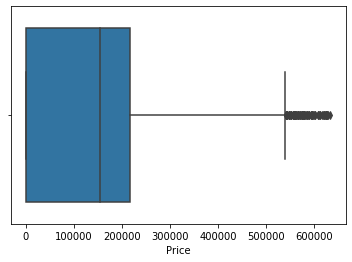

In [55]:
sns.boxplot(df2['Price'])

In [56]:
df2['Square'].sort_values(ascending = False).head()

6977     641.065193
11964    620.000000
4262     604.705972
8437     461.463614
4690     410.639749
Name: Square, dtype: float64

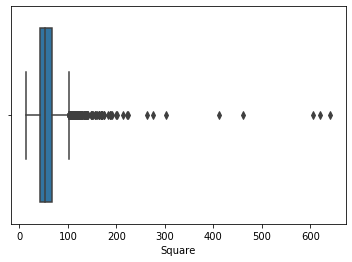

In [57]:
sns.boxplot(df2['Square'])

In [58]:
for i in df2['Rooms'].unique():
    df2.loc[(df2['Square']>200)&(df2['Price'] < 300000)&(df2['Rooms']==i), 'LifeSquare'] = df2.loc[df2['Rooms']==i, 'LifeSquare'].median()
    df2.loc[(df2['Square']>200)&(df2['Price'] < 300000)&(df2['Rooms']==i), 'Square'] = df2.loc[df2['Rooms']==i, 'Square'].median()
    

In [59]:
df2.loc[df2['LifeSquare']>150]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Price,test_data,Ecology_2_B,Ecology_3_B,Shops_2_B,Room1,Room2,Room3,Room4,first_floor
1641,11055,151,1.0,174.837082,174.649522,15.0,10.0,12.0,1958,0.236108,...,232766.187698,0,1,1,1,1,0,0,0,0
1981,7917,27,1.0,212.932361,211.231125,0.0,2.0,3.0,2008,0.211401,...,302211.260887,0,1,1,1,0,0,0,0,0
1982,5548,86,5.0,275.645284,233.949309,26.0,12.0,37.0,2011,0.161976,...,455264.882666,0,1,0,1,0,0,0,0,0
2603,5621,23,3.0,163.495333,161.504222,12.0,3.0,5.0,1977,0.014073,...,207007.956663,0,1,1,1,0,0,1,0,0
3651,5300,30,3.0,170.713651,169.509941,1.0,2.0,2.0,2018,0.000078,...,200800.673767,0,1,1,1,0,0,1,0,0
4047,15362,23,1.0,163.286965,161.155275,1.0,3.0,4.0,1977,0.014073,...,228572.520347,0,1,1,1,1,0,0,0,0
5444,14181,62,3.0,156.636577,153.685835,1.0,1.0,3.0,2005,0.072158,...,502523.573863,0,1,1,0,0,0,1,0,1
8913,2603,30,3.0,164.526757,162.587886,0.0,2.0,3.0,1977,0.000078,...,207407.352593,0,1,1,1,0,0,1,0,0
9910,16568,27,4.0,201.627361,200.334539,25.0,1.0,2.0,2013,0.041116,...,528560.506016,0,1,1,1,0,0,0,1,1
12557,16053,17,4.0,169.901701,168.729035,0.0,0.0,4.0,2013,0.093443,...,0.000000,1,1,1,1,0,0,0,1,0


### Моделирование

In [60]:
basic_drop = ['Price', 'Id', 'test_data']

In [61]:
additional_drop = ['LifeSquare', 'Room1','Room2','Room3', 'Room4']

In [62]:
cols_to_drop = basic_drop + additional_drop

In [63]:
X = df2.loc[df2['test_data'] == 0].drop(columns = cols_to_drop)

In [64]:
y = df2.loc[df2['test_data'] == 0, ['Price']].values

In [65]:
y = y.flatten()

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =333)

In [67]:
clf2 = RandomForestRegressor(n_estimators = 150, max_depth = 17, max_features = 8, random_state = 333)

In [ ]:
clf2.fit(X_train, y_train)

In [ ]:
score = clf2.score(X_test, y_test)

In [ ]:
score

### Prediction

In [ ]:
clf2.fit(X, y)

In [ ]:
y_test_pred = clf2.predict(df2.loc[df2['test_data'] == 1].drop(columns = cols_to_drop))

In [ ]:
df2.loc[df2['test_data']==1, 'Price'] = y_test_pred

In [ ]:
df2.loc[df2['test_data']==1, ['Id', 'Price']].to_csv('result.csv', index = False)